In [3]:
import pandas as pd

df_ = pd.read_csv("cropwheat.csv")
df_.head()



,State,District,Year,Month,Rainfall,Crop,Price
0,Madhya Pradesh,Indore,2004,1,3.2,Wheat,93.1
1,Madhya Pradesh,Indore,2004,2,0.0,Wheat,93.2
2,Madhya Pradesh,Indore,2004,3,0.0,Wheat,94.4
3,Madhya Pradesh,Indore,2004,4,0.0,Wheat,94.8
4,Madhya Pradesh,Indore,2004,5,12.6,Wheat,95.0


In [4]:
df_.describe(include='all')

,State,District,Year,Month,Rainfall,Crop,Price
count,168,168,168.000000,168.000000,168.000000,168,168.000000
unique,1,2,NaN,NaN,NaN,1,NaN
top,Madhya Pradesh,Indore,NaN,NaN,NaN,Wheat,NaN
freq,168,84,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,2007.000000,6.500000,89.570238,NaN,132.816667
std,NaN,NaN,2.005979,3.462373,144.544880,NaN,26.796844
min,NaN,NaN,2004.000000,1.000000,0.000000,NaN,93.100000
25%,NaN,NaN,2005.000000,3.750000,0.275000,NaN,104.400000
50%,NaN,NaN,2007.000000,6.500000,12.300000,NaN,134.850000
75%,NaN,NaN,2009.000000,9.250000,108.800000,NaN,153.150000


In [5]:
df_.shape

(168, 7)

In [6]:
df_.dtypes

State        object
District     object
Year          int64
Month         int64
Rainfall    float64
Crop         object
Price       float64
dtype: object

In [7]:
df_=df_.drop('Crop',axis=1)

In [8]:
df_=pd.get_dummies(df_)
df_.head()

,Year,Month,Rainfall,Price,State_Madhya Pradesh,District_Indore,District_Jabalpur
0,2004,1,3.2,93.1,1,1,0
1,2004,2,0.0,93.2,1,1,0
2,2004,3,0.0,94.4,1,1,0
3,2004,4,0.0,94.8,1,1,0
4,2004,5,12.6,95.0,1,1,0


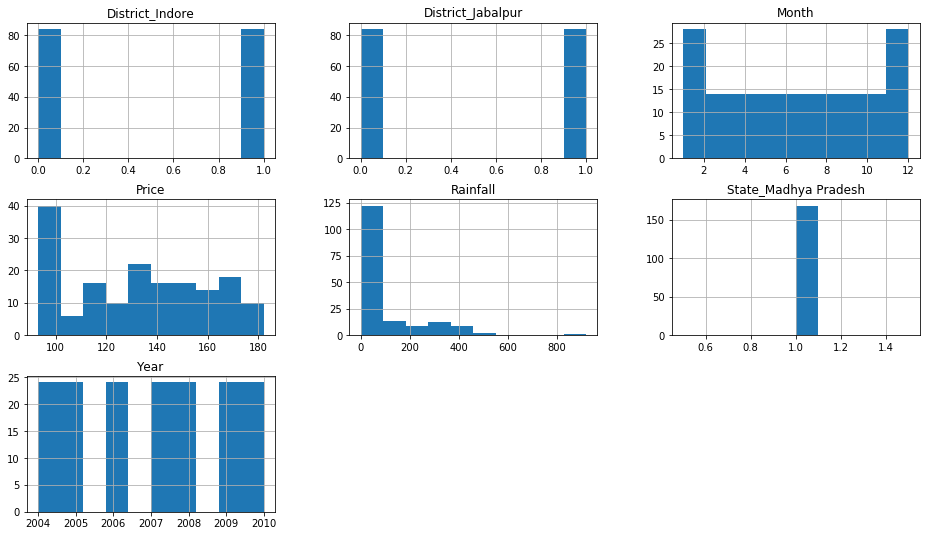

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[16,9]

df_.hist()
plt.show()

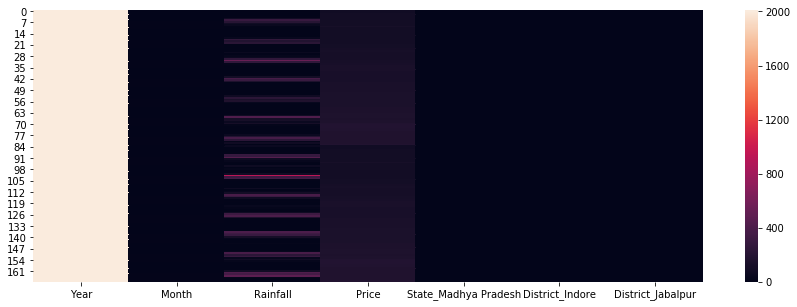

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(df_)

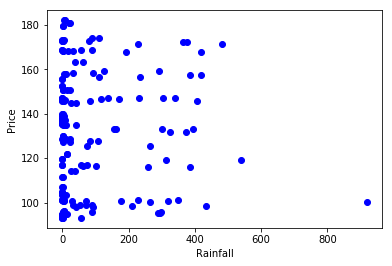

In [11]:
plt.scatter(df_.Rainfall, df_.Price,  color='blue')
plt.xlabel("Rainfall")
plt.ylabel("Price")
plt.show()

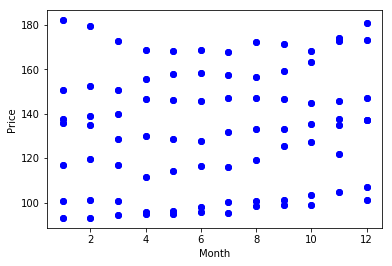

In [12]:
plt.scatter(df_.Month, df_.Price,  color='blue')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

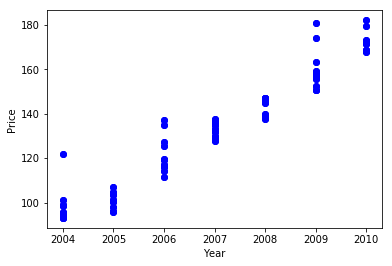

In [13]:
plt.scatter(df_.Year, df_.Price,  color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [14]:
df_=df_.drop(['State_Madhya Pradesh'],axis=1)
y=df_['Price']
df_=df_.drop(['Price'],axis=1)
df_.describe(include='all')

,Year,Month,Rainfall,District_Indore,District_Jabalpur
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2007.000000,6.500000,89.570238,0.500000,0.500000
std,2.005979,3.462373,144.544880,0.501495,0.501495
min,2004.000000,1.000000,0.000000,0.000000,0.000000
25%,2005.000000,3.750000,0.275000,0.000000,0.000000
50%,2007.000000,6.500000,12.300000,0.500000,0.500000
75%,2009.000000,9.250000,108.800000,1.000000,1.000000
max,2010.000000,12.000000,919.300000,1.000000,1.000000


In [15]:
y.head()

0    93.1
1    93.2
2    94.4
3    94.8
4    95.0
Name: Price, dtype: float64

**Train/Test Split**

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
![image.png](attachment:image.png)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_, y, test_size=0.25)

## Linear Regression with Single Variable

In [ ]:
iteration=1000
learning_rate=.01
n=len(y)
slope=0
intercept=0
for i in range(iteration):
    y_predicted=slope*x+intercept
    diff1=-2*((y-y_predicted)*x).sum()/n
    diff2=-2*(y-y_predicted).sum()/n
    slope=slope-learning_rate*diff1
    intercept=intercept-learning_rate*diff2
    cost=((y-y_predicted)**2).sum()/n
    print("slope",slope,"  intercept",intercept,"  iteration",i,"  cost",cost)
    

**Normalization**

This normalization can make some statistical analyses easier down the road.
By making the ranges consistent between variables,
normalization enables a fair comparison between the different features,
making sure they have the same impact. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_=scaler.fit_transform(df_)
df_=pd.DataFrame(data=df_)
df_.head()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,y_train)
y_predicted=reg.predict(X_test)
r2_score(y_predicted,y_test)

0.9459473229237108

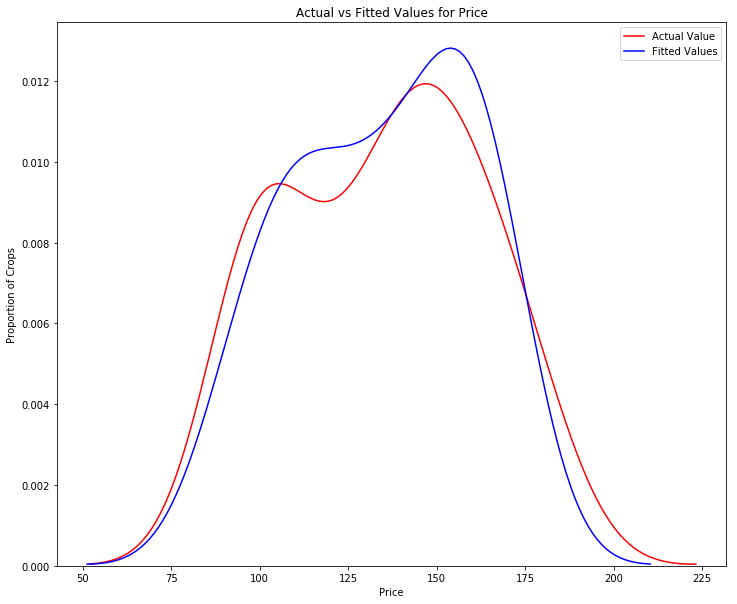

In [18]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Crops')

plt.show()
plt.close()

In [19]:
from sklearn import tree

clf=tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
x_predicted=clf.predict(X_test)
r2_score(x_predicted,y_test)

0.992521512756436

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9948967788848686

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

/home/posi2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:

model = Sequential() # create model
model.add(Dense(output_dim=2, input_dim=5, activation='relu')) # hidden layer
model.add(Dense(output_dim=1, activation='linear')) # output layer
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

/home/posi2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=5, activation="relu", units=2)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/posi2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  after removing the cwd from sys.path.


In [23]:
model_fitted=model.fit(X_train, y_train, batch_size = 50, nb_epoch = 1000)

/home/posi2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1000
126/126 [==============================] - 1s 5ms/step - loss: 1606.4038 - mean_absolute_error: 1606.4038
Epoch 2/1000
126/126 [==============================] - 0s 35us/step - loss: 1594.7120 - mean_absolute_error: 1594.7120
Epoch 3/1000
126/126 [==============================] - 0s 39us/step - loss: 1583.1248 - mean_absolute_error: 1583.1248
Epoch 4/1000
126/126 [==============================] - 0s 38us/step - loss: 1571.5331 - mean_absolute_error: 1571.5331
Epoch 5/1000
126/126 [==============================] - 0s 34us/step - loss: 1560.0050 - mean_absolute_error: 1560.0050
Epoch 6/1000
126/126 [==============================] - 0s 91us/step - loss: 1548.5078 - mean_absolute_error: 1548.5078
Epoch 7/1000
126/126 [==============================] - 0s 67us/step - loss: 1537.0888 - mean_absolute_error: 1537.0888
Epoch 8/1000
126/126 [==============================] - 0s 50us/step - loss: 1525.7023 - mean_absolute_error: 1525.7023
Epoch 9/1000
126/126 [===================

126/126 [==============================] - 0s 112us/step - loss: 469.6843 - mean_absolute_error: 469.6843
Epoch 137/1000
126/126 [==============================] - 0s 85us/step - loss: 464.1060 - mean_absolute_error: 464.1060
Epoch 138/1000
126/126 [==============================] - 0s 70us/step - loss: 458.5681 - mean_absolute_error: 458.5681
Epoch 139/1000
126/126 [==============================] - 0s 127us/step - loss: 453.0656 - mean_absolute_error: 453.0656
Epoch 140/1000
126/126 [==============================] - 0s 76us/step - loss: 447.6035 - mean_absolute_error: 447.6035
Epoch 141/1000
126/126 [==============================] - 0s 56us/step - loss: 442.1778 - mean_absolute_error: 442.1778
Epoch 142/1000
126/126 [==============================] - 0s 53us/step - loss: 436.7650 - mean_absolute_error: 436.7650
Epoch 143/1000
126/126 [==============================] - 0s 67us/step - loss: 431.3910 - mean_absolute_error: 431.3910
Epoch 144/1000
126/126 [=============================

126/126 [==============================] - 0s 61us/step - loss: 23.8626 - mean_absolute_error: 23.8626
Epoch 274/1000
126/126 [==============================] - 0s 68us/step - loss: 23.8377 - mean_absolute_error: 23.8377
Epoch 275/1000
126/126 [==============================] - 0s 64us/step - loss: 23.8120 - mean_absolute_error: 23.8120
Epoch 276/1000
126/126 [==============================] - 0s 55us/step - loss: 23.8052 - mean_absolute_error: 23.8052
Epoch 277/1000
126/126 [==============================] - 0s 75us/step - loss: 23.7830 - mean_absolute_error: 23.7830
Epoch 278/1000
126/126 [==============================] - 0s 56us/step - loss: 23.7766 - mean_absolute_error: 23.7766
Epoch 279/1000
126/126 [==============================] - 0s 117us/step - loss: 23.7635 - mean_absolute_error: 23.7635
Epoch 280/1000
126/126 [==============================] - 0s 84us/step - loss: 23.7470 - mean_absolute_error: 23.7470
Epoch 281/1000
126/126 [==============================] - 0s 62us/step

126/126 [==============================] - 0s 85us/step - loss: 22.9058 - mean_absolute_error: 22.9058
Epoch 412/1000
126/126 [==============================] - 0s 151us/step - loss: 22.9102 - mean_absolute_error: 22.9102
Epoch 413/1000
126/126 [==============================] - 0s 73us/step - loss: 22.9042 - mean_absolute_error: 22.9042
Epoch 414/1000
126/126 [==============================] - 0s 35us/step - loss: 22.9045 - mean_absolute_error: 22.9045
Epoch 415/1000
126/126 [==============================] - 0s 57us/step - loss: 22.8975 - mean_absolute_error: 22.8975
Epoch 416/1000
126/126 [==============================] - 0s 48us/step - loss: 22.8957 - mean_absolute_error: 22.8957
Epoch 417/1000
126/126 [==============================] - 0s 49us/step - loss: 22.8915 - mean_absolute_error: 22.8915
Epoch 418/1000
126/126 [==============================] - 0s 50us/step - loss: 22.8852 - mean_absolute_error: 22.8852
Epoch 419/1000
126/126 [==============================] - 0s 85us/step

126/126 [==============================] - 0s 67us/step - loss: 22.4539 - mean_absolute_error: 22.4539
Epoch 550/1000
126/126 [==============================] - 0s 59us/step - loss: 22.4540 - mean_absolute_error: 22.4540
Epoch 551/1000
126/126 [==============================] - 0s 68us/step - loss: 22.4493 - mean_absolute_error: 22.4493
Epoch 552/1000
126/126 [==============================] - 0s 47us/step - loss: 22.4478 - mean_absolute_error: 22.4478
Epoch 553/1000
126/126 [==============================] - 0s 65us/step - loss: 22.4457 - mean_absolute_error: 22.4457
Epoch 554/1000
126/126 [==============================] - 0s 58us/step - loss: 22.4474 - mean_absolute_error: 22.4474
Epoch 555/1000
126/126 [==============================] - 0s 59us/step - loss: 22.4400 - mean_absolute_error: 22.4400
Epoch 556/1000
126/126 [==============================] - 0s 56us/step - loss: 22.4473 - mean_absolute_error: 22.4473
Epoch 557/1000
126/126 [==============================] - 0s 55us/step 

126/126 [==============================] - 0s 60us/step - loss: 22.4239 - mean_absolute_error: 22.4239
Epoch 688/1000
126/126 [==============================] - 0s 84us/step - loss: 22.4223 - mean_absolute_error: 22.4223
Epoch 689/1000
126/126 [==============================] - 0s 90us/step - loss: 22.4217 - mean_absolute_error: 22.4217
Epoch 690/1000
126/126 [==============================] - 0s 50us/step - loss: 22.4209 - mean_absolute_error: 22.4209
Epoch 691/1000
126/126 [==============================] - 0s 90us/step - loss: 22.4215 - mean_absolute_error: 22.4215
Epoch 692/1000
126/126 [==============================] - 0s 76us/step - loss: 22.4213 - mean_absolute_error: 22.4213
Epoch 693/1000
126/126 [==============================] - 0s 47us/step - loss: 22.4211 - mean_absolute_error: 22.4211
Epoch 694/1000
126/126 [==============================] - 0s 57us/step - loss: 22.4259 - mean_absolute_error: 22.4259
Epoch 695/1000
126/126 [==============================] - 0s 91us/step 

126/126 [==============================] - 0s 51us/step - loss: 22.4091 - mean_absolute_error: 22.4091
Epoch 826/1000
126/126 [==============================] - 0s 65us/step - loss: 22.4084 - mean_absolute_error: 22.4084
Epoch 827/1000
126/126 [==============================] - 0s 82us/step - loss: 22.4088 - mean_absolute_error: 22.4088
Epoch 828/1000
126/126 [==============================] - 0s 94us/step - loss: 22.4097 - mean_absolute_error: 22.4097
Epoch 829/1000
126/126 [==============================] - 0s 89us/step - loss: 22.4128 - mean_absolute_error: 22.4128
Epoch 830/1000
126/126 [==============================] - 0s 64us/step - loss: 22.4089 - mean_absolute_error: 22.4089
Epoch 831/1000
126/126 [==============================] - 0s 90us/step - loss: 22.4181 - mean_absolute_error: 22.4181
Epoch 832/1000
126/126 [==============================] - 0s 92us/step - loss: 22.4125 - mean_absolute_error: 22.4125
Epoch 833/1000
126/126 [==============================] - 0s 80us/step 

126/126 [==============================] - 0s 62us/step - loss: 22.4052 - mean_absolute_error: 22.4052
Epoch 964/1000
126/126 [==============================] - 0s 61us/step - loss: 22.4019 - mean_absolute_error: 22.4019
Epoch 965/1000
126/126 [==============================] - 0s 52us/step - loss: 22.4011 - mean_absolute_error: 22.4011
Epoch 966/1000
126/126 [==============================] - 0s 61us/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 967/1000
126/126 [==============================] - 0s 114us/step - loss: 22.3948 - mean_absolute_error: 22.3948
Epoch 968/1000
126/126 [==============================] - 0s 64us/step - loss: 22.3940 - mean_absolute_error: 22.3940
Epoch 969/1000
126/126 [==============================] - 0s 58us/step - loss: 22.3969 - mean_absolute_error: 22.3969
Epoch 970/1000
126/126 [==============================] - 0s 82us/step - loss: 22.3954 - mean_absolute_error: 22.3954
Epoch 971/1000
126/126 [==============================] - 0s 48us/step

In [24]:
x_predicted=model.predict(X_test)


In [25]:
import numpy as np
x=np.array([[2011,1,0,0,1]])
model.predict(x)

array([[135.51576]], dtype=float32)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [28]:
model.save_weights("model.h5")
print("Model succesfully saved")

Model succesfullt saved
